In [1]:
suppressPackageStartupMessages(library(lubridate))  #this library is usefull for cheanging date
#SupressPackagestatupMessages will supress the warning message

Warning message:
"package 'lubridate' was built under R version 3.6.3"

In [2]:
Sneaker = read.csv("StockX-Data-Contest.csv") #load data into notbook

In [3]:
head(Sneaker) #first few rows

ï..Order.Date,Brand,Sneaker.Name,Sale.Price,Retail.Price,Release.Date,Shoe.Size,Buyer.Region
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan


In [4]:
attach(Sneaker) #attaching data set to notebook allow us to avoid repeating the dataset name with the column name

## Visualtionzation before any change

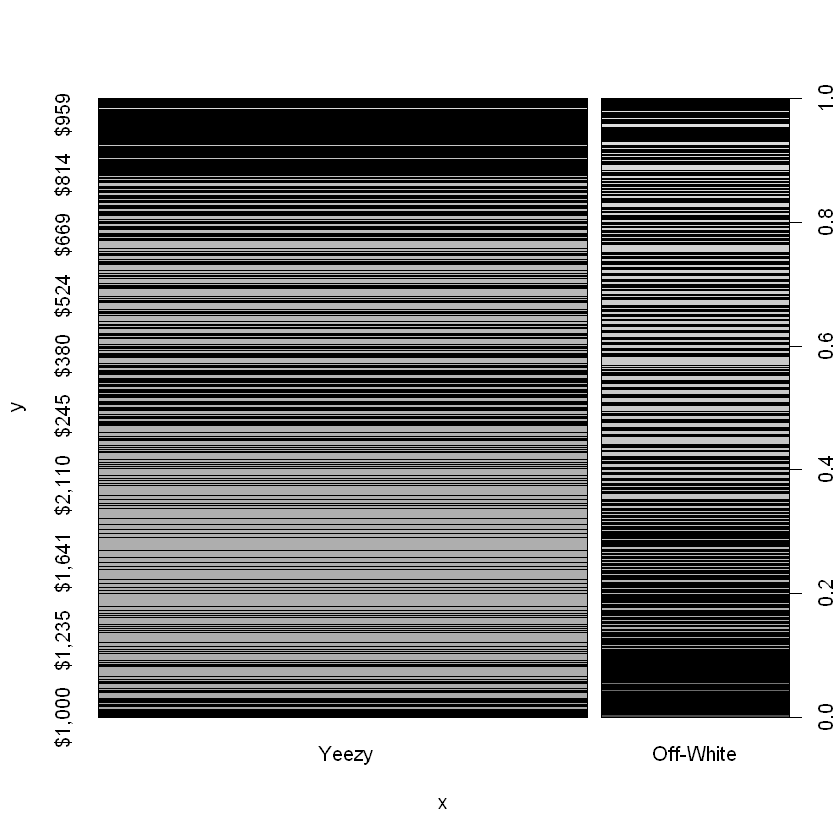

In [5]:
plot(Brand, Sale.Price)

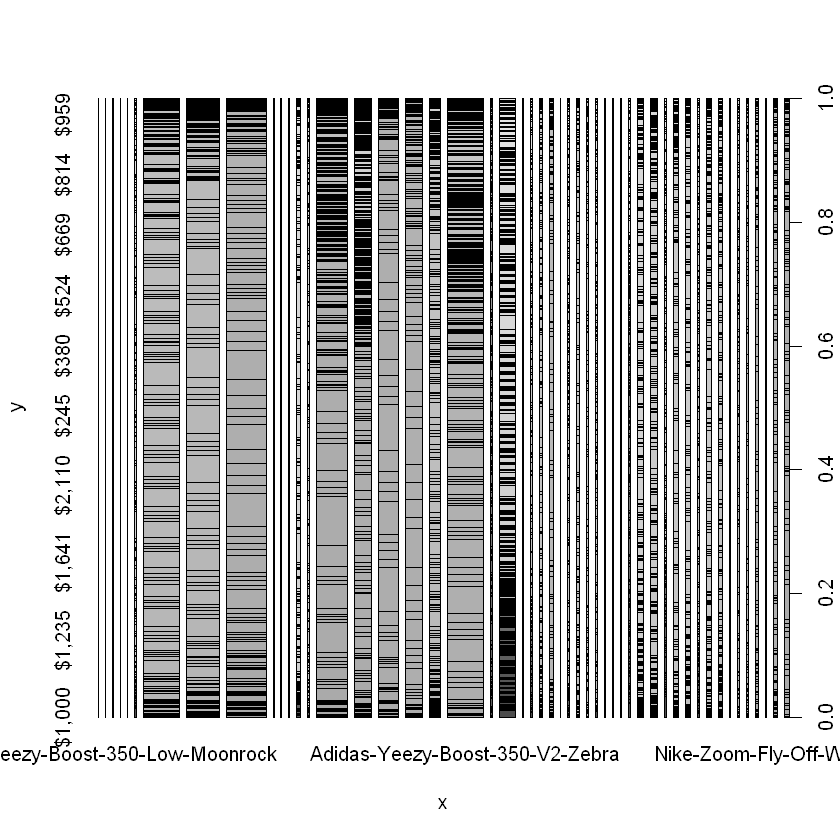

In [6]:
plot(Sneaker.Name, Sale.Price)

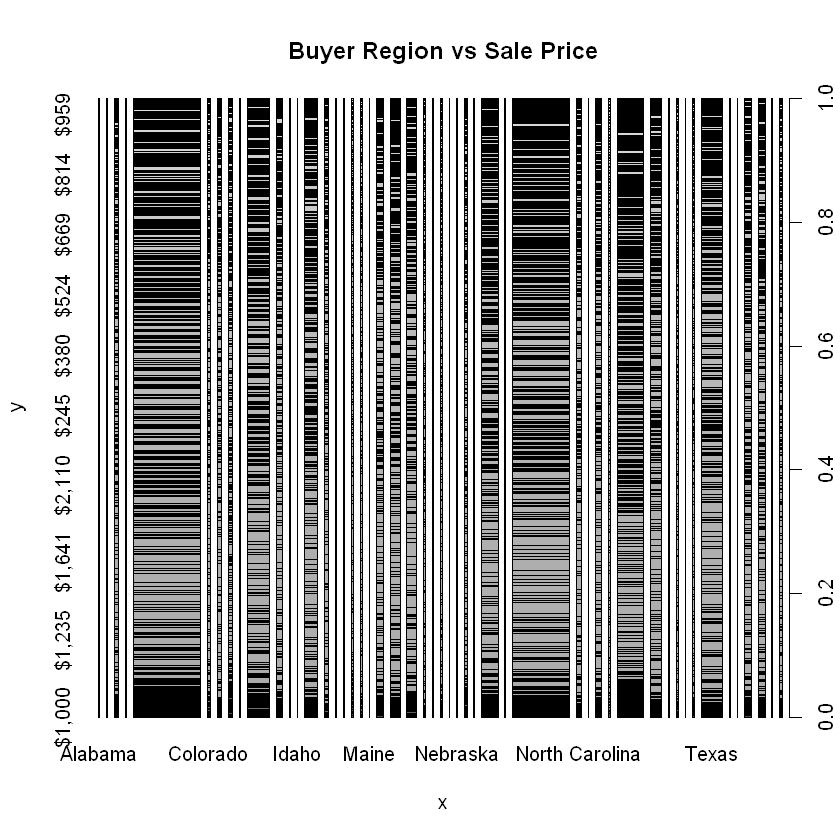

In [7]:
plot(Buyer.Region, Sale.Price, main= "Buyer Region vs Sale Price")

In [8]:
#plot(Sneaker)

## Data Cleaning process

In [9]:
#clean the data set
Sale_Price <- as.numeric(gsub('[$,]', '', Sale.Price)) #remove $ and comma from sale price value and convert it into nemuric value
Retail_Price <- as.numeric(gsub('[$,]', '', Retail.Price)) #same as sales price
Release_Date = mdy(Release.Date) #mdy is a function of lubridate library, which is use convert chr value to date value
Order_Date= mdy(ï..Order.Date) #same as release date but order date column name have some wierd symbol on it so we remove is too
Shoe_Size = Shoe.Size # We rename the column name
Sneaker_Name = Sneaker.Name #we rename the column name
Buyer_Region = Buyer.Region #we rename the coulmn name

In [10]:
#Make a new data set from old modified data set. we keep Brand, sneaker name, shoe size, date and price, region. 
NewSneaker <- data.frame(Brand,Sneaker_Name, Shoe_Size, Release_Date, Retail_Price, Order_Date, Sale_Price, Buyer_Region)
head(NewSneaker)

Brand,Sneaker_Name,Shoe_Size,Release_Date,Retail_Price,Order_Date,Sale_Price,Buyer_Region
Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,2016-09-24,220,2017-09-01,1097,California
Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,11.0,2016-11-23,220,2017-09-01,685,California
Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,11.0,2016-11-23,220,2017-09-01,690,California
Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,2016-11-23,220,2017-09-01,1075,Kentucky
Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,11.0,2017-02-11,220,2017-09-01,828,Rhode Island
Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,8.5,2017-02-11,220,2017-09-01,798,Michigan


In [11]:
summary(NewSneaker) #summary of the new dataFrame

       Brand                                      Sneaker_Name  
  Yeezy   :72162   adidas-Yeezy-Boost-350-V2-Butter     :11423  
 Off-White:27794   Adidas-Yeezy-Boost-350-V2-Beluga-2pt0:10395  
                   Adidas-Yeezy-Boost-350-V2-Zebra      :10110  
                   Adidas-Yeezy-Boost-350-V2-Blue-Tint  : 9297  
                   Adidas-Yeezy-Boost-350-V2-Cream-White: 9097  
                   Adidas-Yeezy-Boost-350-V2-Sesame     : 5553  
                   (Other)                              :44081  
   Shoe_Size       Release_Date         Retail_Price     Order_Date        
 Min.   : 3.500   Min.   :2015-06-27   Min.   :130.0   Min.   :2017-09-01  
 1st Qu.: 8.000   1st Qu.:2017-09-09   1st Qu.:220.0   1st Qu.:2018-05-02  
 Median : 9.500   Median :2017-12-16   Median :220.0   Median :2018-09-24  
 Mean   : 9.344   Mean   :2018-02-10   Mean   :208.6   Mean   :2018-08-12  
 3rd Qu.:11.000   3rd Qu.:2018-08-03   3rd Qu.:220.0   3rd Qu.:2018-12-15  
 Max.   :17.000   Max.  

## visualizing 

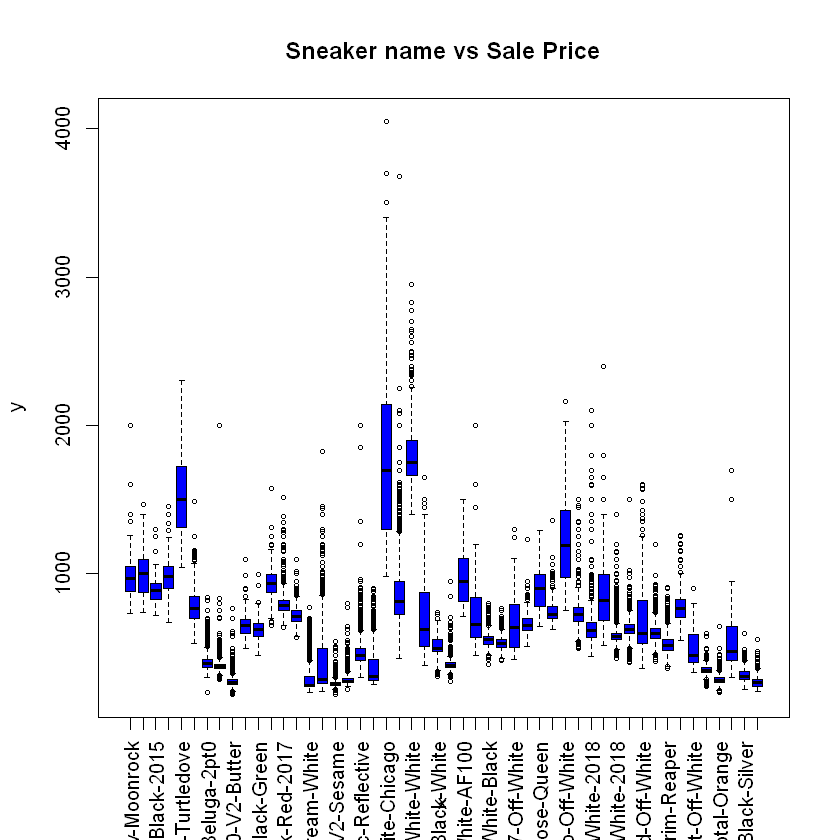

In [12]:
plot(Sneaker_Name, Sale_Price, bg = "red", col = "blue", main = "Sneaker name vs Sale Price", las = 3, cex=0.5)

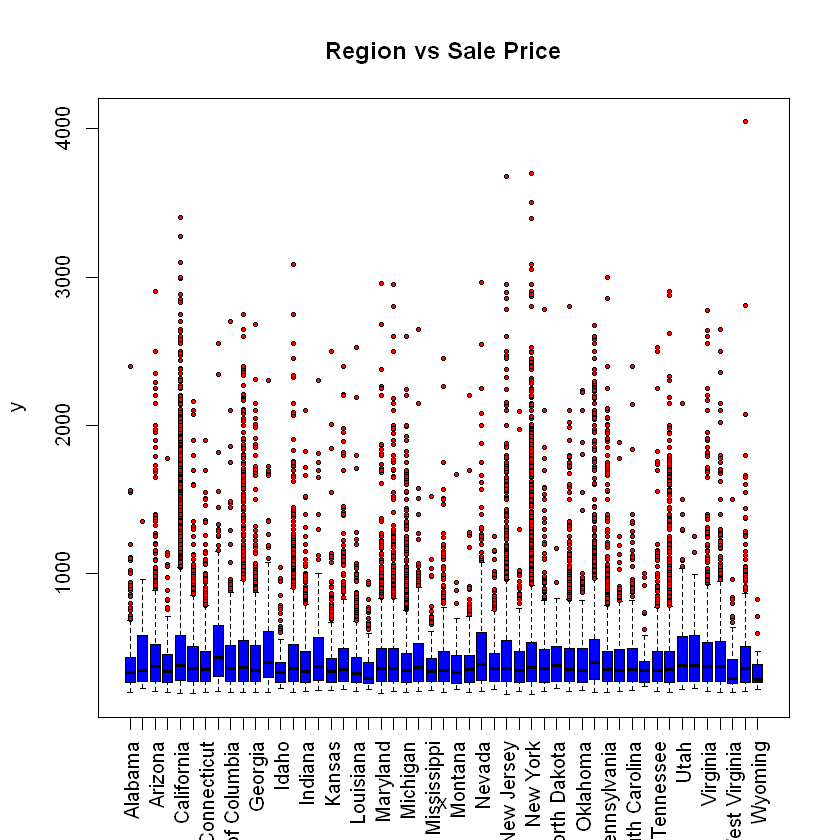

In [13]:
plot(Buyer_Region, Sale_Price, pch = 21,
     bg = "red",   # Fill color
     col = "blue", main = "Region vs Sale Price", las = 3, font.axis = 2, font.lab  = .5, cex=0.5)

## split the data set

In [14]:
NewSneaker_02 <- data.frame(NewSneaker) #another new data frame cration to avoid misuse our old data set
#each time a new model we would create we will make another data frame from NewSneaker data set and name it NewSneaker_n
smp_size <- floor(0.8 * nrow(NewSneaker_02))
set.seed(123)
train_ind <- sample(seq_len(nrow(NewSneaker_02)), size = smp_size)

train <- NewSneaker_02[train_ind, ]
test <- NewSneaker_02[-train_ind, ]

In [15]:
library(rpart) #this library are usefull for making a decission tree
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"

## Model#1: Make a Decision tree

In [16]:
names(NewSneaker_02)

[1] "Brand"        "Sneaker_Name" "Shoe_Size"    "Release_Date" "Retail_Price"
[6] "Order_Date"   "Sale_Price"   "Buyer_Region"

In [17]:
#we make a train dataset we indipendent variable such as sneaker name, price, region, and shoe size
result02 <- rpart(Sale_Price~Sneaker_Name+Shoe_Size+Retail_Price+Buyer_Region, data = train ,
             control = rpart.control(minsplit = 1, minbucket = 1,cp = 0.001))
result02

n= 79964 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 79964 5269570000  447.0399  
    2) Sneaker_Name=Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Adidas-Yeezy-Boost-350-V2-Blue-Tint,adidas-Yeezy-Boost-350-V2-Butter,Adidas-Yeezy-Boost-350-V2-Cream-White,Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,Adidas-Yeezy-Boost-350-V2-Sesame,adidas-Yeezy-Boost-350-V2-Static,adidas-Yeezy-Boost-350-V2-Static-Reflective,Adidas-Yeezy-Boost-350-V2-Zebra,Nike-Air-Force-1-Low-Off-White-Black-White,Nike-Air-Force-1-Low-Off-White-Volt,Nike-Air-Max-90-Off-White-Black,Nike-Air-Max-90-Off-White-Desert-Ore,Nike-Blazer-Mid-Off-White-Grim-Reaper,Nike-React-Hyperdunk-2017-Flyknit-Off-White,Nike-Zoom-Fly-Mercurial-Off-White-Black,Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Nike-Zoom-Fly-Off-White,Nike-Zoom-Fly-Off-White-Black-Silver,Nike-Zoom-Fly-Off-White-Pink 62677  711569600  348.5421  
      4) Sneaker_Name=adidas-Yeezy-Boost-350-V2-Butter,Adidas-Yeezy-Boost-350-V2-Cream-White,Adidas

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

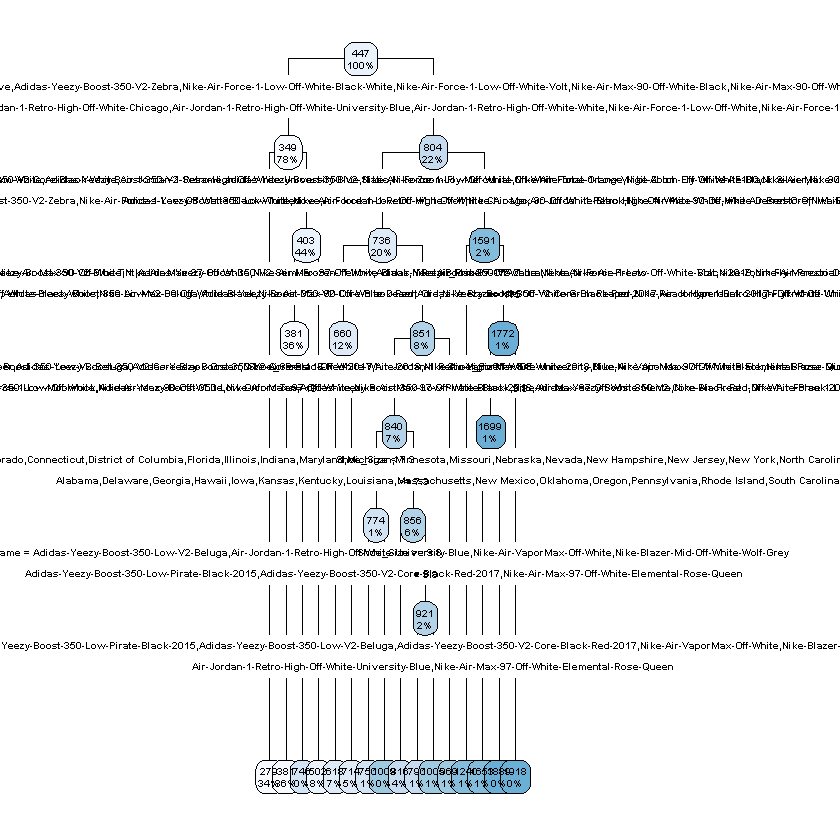

In [18]:
rpart.plot(result02,type =4, fallen.leaves = T, cex =0.5)

## Run a prediction data set to test our model

#### let's say,  based on given three factors such as sneaker name, place of buying state, and the retail price, can we predict the Sneaker sale's price? 
Here are all the value are in numric form, becuase we convert those into number from text.

In [19]:
#we testing our decission tree with a given data set
test_set = data.frame(Sneaker_Name="Adidas-Yeezy-Boost-350-Low-Moonrock",Shoe_Size= 11.0,Retail_Price= 220, Buyer_Region= "New York", day_Order=100)
test_set

Sneaker_Name,Shoe_Size,Retail_Price,Buyer_Region,day_Order
Adidas-Yeezy-Boost-350-Low-Moonrock,11,220,New York,100


In [20]:
prediction = predict(result02, newdata = test_set, type = "vector")
prediction= round(prediction, digits=2)
paste('$',formatC(prediction))

[1] "$ 968.6"

## Make a tree with name code

Our model is working fine, but the name of the sneaker is too long that is make our model look like crowdy and messy. So we mamke a new clean data set and use code instead of long name.

In [21]:
#clean the data set
Sale_Price <- as.numeric(gsub('[$,]', '', Sale.Price)) #remove $ and comma from sale price value and convert it into nemuric value
Retail_Price <- as.numeric(gsub('[$,]', '', Retail.Price)) #same as sales price
Release_Date = mdy(Release.Date) #mdy is a function of lubridate library, which is use convert chr value to date value
Order_Date= mdy(ï..Order.Date) #same as release date
Shoe_Size = Shoe.Size
Sneaker_Name_code = unclass(Sneaker.Name) # unclass function will change the name to a code
Buyer_Region_code = unclass(Buyer.Region)

In [22]:
NewSneaker_03<- data.frame(Brand,Sneaker_Name_code, Shoe_Size, Release_Date, Retail_Price, Order_Date,  Sale_Price, Buyer_Region_code)
head(NewSneaker_03)

Brand,Sneaker_Name_code,Shoe_Size,Release_Date,Retail_Price,Order_Date,Sale_Price,Buyer_Region_code
Yeezy,6,11.0,2016-09-24,220,2017-09-01,1097,5
Yeezy,10,11.0,2016-11-23,220,2017-09-01,685,5
Yeezy,11,11.0,2016-11-23,220,2017-09-01,690,5
Yeezy,12,11.5,2016-11-23,220,2017-09-01,1075,18
Yeezy,13,11.0,2017-02-11,220,2017-09-01,828,40
Yeezy,13,8.5,2017-02-11,220,2017-09-01,798,23


In [23]:
summary(NewSneaker_03)

       Brand       Sneaker_Name_code   Shoe_Size       Release_Date       
  Yeezy   :72162   Min.   : 1.00     Min.   : 3.500   Min.   :2015-06-27  
 Off-White:27794   1st Qu.: 9.00     1st Qu.: 8.000   1st Qu.:2017-09-09  
                   Median :17.00     Median : 9.500   Median :2017-12-16  
                   Mean   :19.13     Mean   : 9.344   Mean   :2018-02-10  
                   3rd Qu.:22.00     3rd Qu.:11.000   3rd Qu.:2018-08-03  
                   Max.   :50.00     Max.   :17.000   Max.   :2019-02-07  
  Retail_Price     Order_Date           Sale_Price     Buyer_Region_code
 Min.   :130.0   Min.   :2017-09-01   Min.   : 186.0   Min.   : 1.00    
 1st Qu.:220.0   1st Qu.:2018-05-02   1st Qu.: 275.0   1st Qu.: 9.00    
 Median :220.0   Median :2018-09-24   Median : 370.0   Median :29.00    
 Mean   :208.6   Mean   :2018-08-12   Mean   : 446.6   Mean   :24.01    
 3rd Qu.:220.0   3rd Qu.:2018-12-15   3rd Qu.: 540.0   3rd Qu.:36.00    
 Max.   :250.0   Max.   :2019-02-13  

In [24]:
NewSneaker_03 <- data.frame(NewSneaker_03) #another new data frame cration to avoid misuse our old data set
#each time a new model we would create we will make another data frame from NewSneaker data set and name it NewSneaker_n
smp_size <- floor(0.8 * nrow(NewSneaker_03))
set.seed(123)
train_ind04 <- sample(seq_len(nrow(NewSneaker_03)), size = smp_size)

train04 <- NewSneaker_03[train_ind04, ]
test04 <- NewSneaker_03[-train_ind04, ]

In [25]:
names(train04)

[1] "Brand"             "Sneaker_Name_code" "Shoe_Size"        
[4] "Release_Date"      "Retail_Price"      "Order_Date"       
[7] "Sale_Price"        "Buyer_Region_code"

In [26]:
result04 <- rpart(Sale_Price~Sneaker_Name_code+Shoe_Size+Retail_Price+Buyer_Region_code, data = train04 ,
             control = rpart.control(minsplit = 1, minbucket = 1,cp = 0.001))
result04

n= 79964 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 79964 5269570000  447.0399  
    2) Sneaker_Name_code< 20.5 57677 1197254000  360.0260  
      4) Sneaker_Name_code>=6.5 56903  903626700  352.4130  
        8) Sneaker_Name_code>=8.5 41142  844510100  337.9599  
         16) Sneaker_Name_code< 9.5 9118    7803576  269.8462 *
         17) Sneaker_Name_code>=9.5 32024  782359200  357.3535  
           34) Sneaker_Name_code>=14.5 30188  421040700  332.2476  
             68) Sneaker_Name_code< 18.5 19561  234134900  302.7263  
              136) Sneaker_Name_code>=16.5 8380    7559512  274.8785 *
              137) Sneaker_Name_code< 16.5 11181  215206100  323.5978  
                274) Sneaker_Name_code< 15.5 7300   47890330  289.0364 *
                275) Sneaker_Name_code>=15.5 3881  142194500  388.6063 *
             69) Sneaker_Name_code>=18.5 10627  138478900  386.5872  
              138) Sneaker_Name_code>=19.5 8096   95562500  361.1709 *
      

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

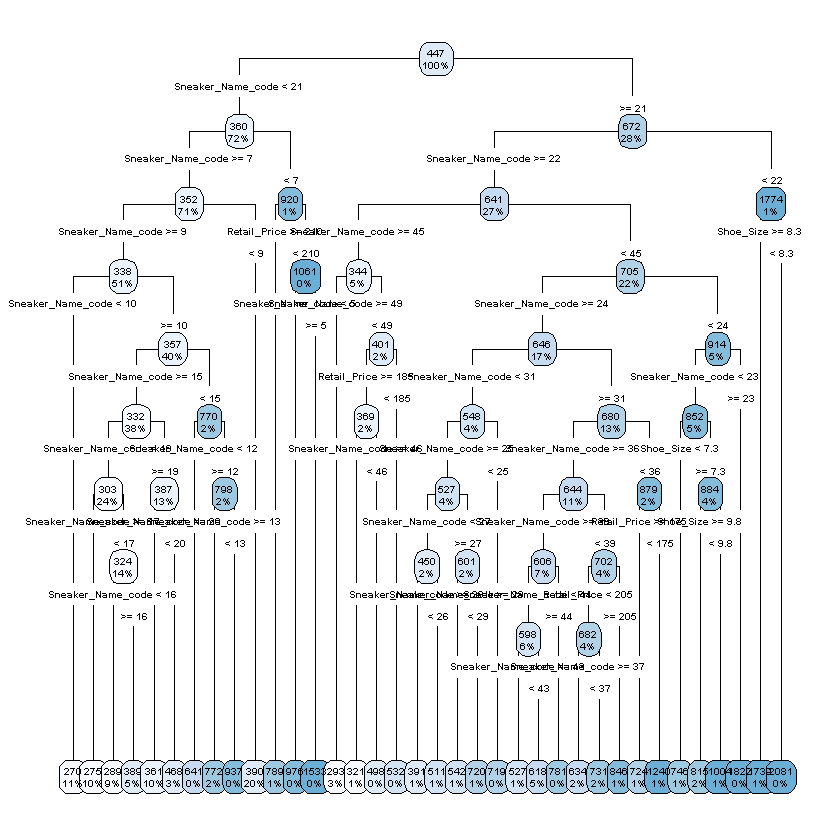

In [27]:
rpart.plot(result04,type =4, fallen.leaves = T, cex =0.5)

In [28]:
test_set_code = data.frame(Sneaker_Name_code=2,Shoe_Size=10.0, Retail_Price= 220, Buyer_Region_code= 24)
test_set_code

Sneaker_Name_code,Shoe_Size,Retail_Price,Buyer_Region_code
2,10,220,24


In [29]:
prediction = predict(result04, newdata = test_set_code, type = "vector")
prediction= round(prediction, digits=2)
paste('$',formatC(prediction))

[1] "$ 788.5"


## Model#2: Multiple Linear regression

In [30]:
#clean the data set for Multiple linear regression
Sale_Price <- as.numeric(gsub('[$,]', '', Sale.Price)) #remove $ and comma from sale price value and convert it into nemuric value
Retail_Price <- as.numeric(gsub('[$,]', '', Retail.Price)) #same as sales price
Release_Date = mdy(Release.Date) #mdy is a function of lubridate library, which is use convert chr value to date value
Order_Date= mdy(ï..Order.Date) #same as release date
Shoe_Size = Shoe.Size
Sneaker_Code = unclass(Sneaker.Name) #unclass function use for grouping items and convert value to a numric data set of data
Buyer_Region_Code = unclass(Buyer.Region) # same as Sneaker name, here we convert state name to a numric value

In [31]:
#Make a new data set from old modified data set
NewSneaker03 <- data.frame(Brand,Sneaker_Code, Shoe_Size, Release_Date, Retail_Price, Order_Date, Sale_Price, Buyer_Region_Code)
head(NewSneaker03)

Brand,Sneaker_Code,Shoe_Size,Release_Date,Retail_Price,Order_Date,Sale_Price,Buyer_Region_Code
Yeezy,6,11.0,2016-09-24,220,2017-09-01,1097,5
Yeezy,10,11.0,2016-11-23,220,2017-09-01,685,5
Yeezy,11,11.0,2016-11-23,220,2017-09-01,690,5
Yeezy,12,11.5,2016-11-23,220,2017-09-01,1075,18
Yeezy,13,11.0,2017-02-11,220,2017-09-01,828,40
Yeezy,13,8.5,2017-02-11,220,2017-09-01,798,23


In [32]:
summary(NewSneaker03)

       Brand        Sneaker_Code     Shoe_Size       Release_Date       
  Yeezy   :72162   Min.   : 1.00   Min.   : 3.500   Min.   :2015-06-27  
 Off-White:27794   1st Qu.: 9.00   1st Qu.: 8.000   1st Qu.:2017-09-09  
                   Median :17.00   Median : 9.500   Median :2017-12-16  
                   Mean   :19.13   Mean   : 9.344   Mean   :2018-02-10  
                   3rd Qu.:22.00   3rd Qu.:11.000   3rd Qu.:2018-08-03  
                   Max.   :50.00   Max.   :17.000   Max.   :2019-02-07  
  Retail_Price     Order_Date           Sale_Price     Buyer_Region_Code
 Min.   :130.0   Min.   :2017-09-01   Min.   : 186.0   Min.   : 1.00    
 1st Qu.:220.0   1st Qu.:2018-05-02   1st Qu.: 275.0   1st Qu.: 9.00    
 Median :220.0   Median :2018-09-24   Median : 370.0   Median :29.00    
 Mean   :208.6   Mean   :2018-08-12   Mean   : 446.6   Mean   :24.01    
 3rd Qu.:220.0   3rd Qu.:2018-12-15   3rd Qu.: 540.0   3rd Qu.:36.00    
 Max.   :250.0   Max.   :2019-02-13   Max.   :4050.

### spliting the data set

In [33]:
NewSneaker03 <- data.frame(NewSneaker03) #another new data frame cration to avoid misuse our old data set
#each time a new model we would create we will make another data frame from NewSneaker data set and name it NewSneaker_n
smp_size <- floor(0.8 * nrow(NewSneaker03))
set.seed(123)
train_ind <- sample(seq_len(nrow(NewSneaker03)), size = smp_size)

train <- NewSneaker03[train_ind, ]
test <- NewSneaker03[-train_ind, ]

In [34]:
names(NewSneaker03)

[1] "Brand"             "Sneaker_Code"      "Shoe_Size"        
[4] "Release_Date"      "Retail_Price"      "Order_Date"       
[7] "Sale_Price"        "Buyer_Region_Code"

In [35]:
model <- lm(Sale_Price~., data = train)
summary(model)


Call:
lm(formula = Sale_Price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-526.32  -92.03  -49.58   66.02 3137.49 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        8.024e+03  9.244e+01   86.803  < 2e-16 ***
BrandOff-White     6.096e+02  3.267e+00  186.572  < 2e-16 ***
Sneaker_Code      -1.151e+01  1.108e-01 -103.909  < 2e-16 ***
Shoe_Size          1.933e+00  2.824e-01    6.846 7.66e-12 ***
Release_Date      -2.929e-01  3.195e-03  -91.673  < 2e-16 ***
Retail_Price      -1.534e-01  3.773e-02   -4.066 4.78e-05 ***
Order_Date        -1.330e-01  5.306e-03  -25.070  < 2e-16 ***
Buyer_Region_Code -1.791e-01  4.479e-02   -3.999 6.38e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.1 on 79956 degrees of freedom
Multiple R-squared:  0.4801,	Adjusted R-squared:  0.4801 
F-statistic: 1.055e+04 on 7 and 79956 DF,  p-value: < 2.2e-16


### This model has 48% accuracy rate and has a less than 0.05 of p-value. However it has a higher standard error, that means it has too many outliear. So we could conclud, this model is not statasitically significant. 